/home/markmuetz/anaconda3/envs/hackathon_env/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<xarray.Dataset> Size: 3TB
Dimensions:                              (time: 87664, depth_half: 73,
                                          cell: 12288, crs: 1, depth_full: 72,
                                          level_full: 90,
                                          soil_depth_water_level: 5,
                                          soil_depth_energy_level: 5,
                                          level_half: 91)
Coordinates:
  * crs                                  (crs) float32 4B nan
  * depth_full                           (depth_full) float32 288B 1.0 ... 5....
  * depth_half                           (depth_half) float32 292B 0.0 ... 5....
  * level_full                           (level_full) int32 360B 1 2 3 ... 89 90
  * soil_depth_energy_level              (soil_depth_energy_level) float32 20B ...
  * soil_depth_water_level               (soil_depth_water_level) float32 20B ...
  * time                                 (time) datetime64[ns] 701kB 2020-01-...
    

<Figure size 640x480 with 0 Axes>

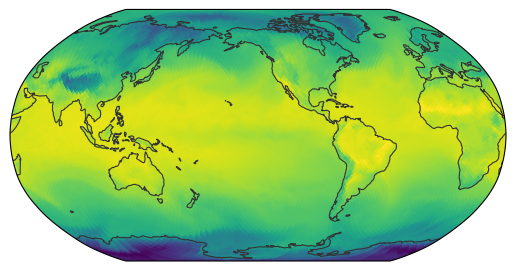

In [3]:
import intake
import easygems.healpix as egh

date = "2020-10-28T00:00:00"
cat = intake.open_catalog("https://data.nextgems-h2020.eu/online.yaml")
ds = cat["ICON.ngc4008"](zoom=5, time="PT3H").to_dask()
print(ds)
tas = ds.tas.sel(time=date)
egh.healpix_show(tas)

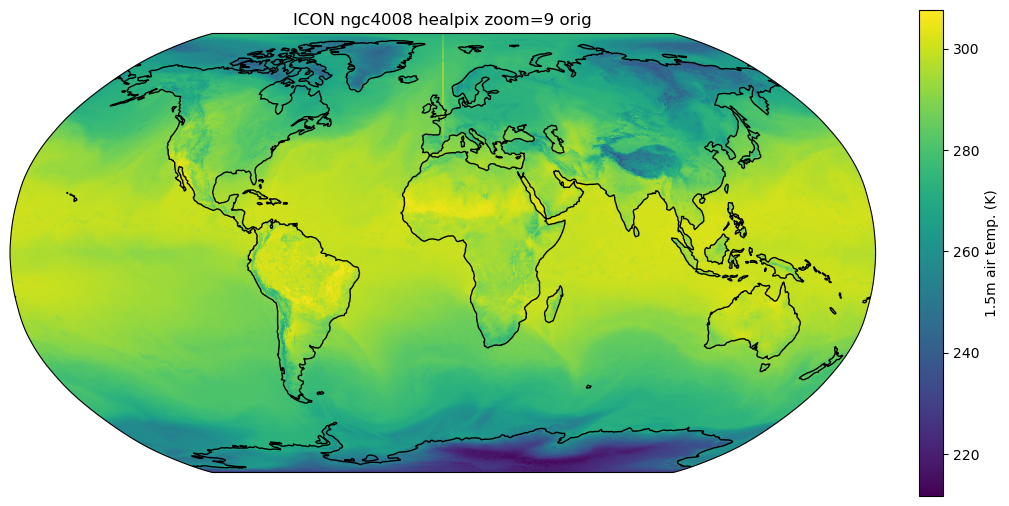

In [8]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import easygems.healpix as egh


projection = ccrs.Robinson(central_longitude=0)
zoom = 9
fig, ax0 = plt.subplots(1, 1, figsize=(10, 5), subplot_kw={'projection': projection}, layout='constrained')
ax0.set_title(f'ICON ngc4008 healpix zoom={zoom} orig')
ax0.set_global()
im = egh.healpix_show(tas.values, ax=ax0);
plt.colorbar(im, label='1.5m air temp. (K)')
ax0.coastlines();

In [3]:
print(intake.__version__)

0.7.0


In [3]:
cat

online:
  args:
    path: https://data.nextgems-h2020.eu/online.yaml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata: {}


In [4]:
cat["ICON.ngc4008"]

ngc4008:
  args:
    chunks: null
    consolidated: true
    urlpath: https://s3.eu-dkrz-1.dkrz.cloud/nextgems/rechunked_ngc4008/ngc4008_P1D_0.zarr
  description: ''
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: https://data.nextgems-h2020.eu/ICON
    experiment_id: nextgems_prefinal
    project: nextGEMS
    simulation_id: ngc4008
    source_id: ICON-ESM


In [5]:
cat["ICON.ngc4008"](zoom=5, time="PT3H")

ngc4008:
  args:
    chunks: null
    consolidated: true
    urlpath: https://s3.eu-dkrz-1.dkrz.cloud/nextgems/rechunked_ngc4008/ngc4008_PT3H_5.zarr
  description: ''
  driver: intake_xarray.xzarr.ZarrSource
  metadata:
    catalog_dir: https://data.nextgems-h2020.eu/ICON
    experiment_id: nextgems_prefinal
    project: nextGEMS
    simulation_id: ngc4008
    source_id: ICON-ESM


In [5]:
import xarray as xr
ds = xr.open_dataset('https://s3.eu-dkrz-1.dkrz.cloud/nextgems/rechunked_ngc4008/ngc4008_P1D_0.zarr', engine='zarr')

In [6]:
ds

<xarray.Dataset> Size: 883MB
Dimensions:                              (time: 10958, depth_half: 73,
                                          cell: 12, level_full: 90, crs: 1,
                                          depth_full: 72,
                                          soil_depth_water_level: 5,
                                          level_half: 91,
                                          soil_depth_energy_level: 5)
Coordinates:
  * crs                                  (crs) float32 4B nan
  * depth_full                           (depth_full) float32 288B 1.0 ... 5....
  * depth_half                           (depth_half) float32 292B 0.0 ... 5....
  * level_full                           (level_full) int32 360B 1 2 3 ... 89 90
  * level_half                           (level_half) int32 364B 1 2 3 ... 90 91
  * soil_depth_energy_level              (soil_depth_energy_level) float32 20B ...
  * soil_depth_water_level               (soil_depth_water_level) float32 20B ...
  * time                                 (time) datetime64[ns] 88kB 2020-01-0...
Dimensions without coordinates: cell
Data variables: (12/103)
    A_tracer_v_to                        (time, depth_half, cell) float32 38MB ...
    FrshFlux_IceSalt                     (time, cell) float32 526kB ...
    FrshFlux_TotalIce                    (time, cell) float32 526kB ...
    Qbot                                 (time, cell) float32 526kB ...
    Qtop                                 (time, cell) float32 526kB ...
    Wind_Speed_10m                       (time, cell) float32 526kB ...
    ...                                   ...
    vas                                  (time, cell) float32 526kB ...
    w                                    (time, depth_half, cell) float32 38MB ...
    wa_phy                               (time, level_half, cell) float32 48MB ...
    zg                                   (level_full, cell) float32 4kB ...
    zghalf                               (level_half, cell) float32 4kB ...
    zos                                  (time, cell) float32 526kB ...